# Dataset

# SMSSpamCollection
# Location : https://mitu.co.in/dataset

In [1]:
#impport libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names= ['label', 'text'])

In [3]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.shape

(5572, 2)

In [5]:
df.loc[2567,'text']

'You in your room? I need a few'

##### Sperate the input and output Data

In [6]:
# Input 
x = df['text']


# output 
y = df['label']

In [7]:
set(y)

{'ham', 'spam'}

<Axes: xlabel='count', ylabel='label'>

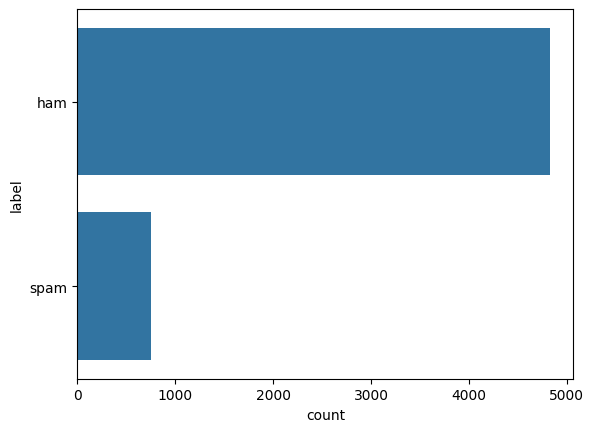

In [8]:

sns.countplot(y)

In [9]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: ylabel='label'>

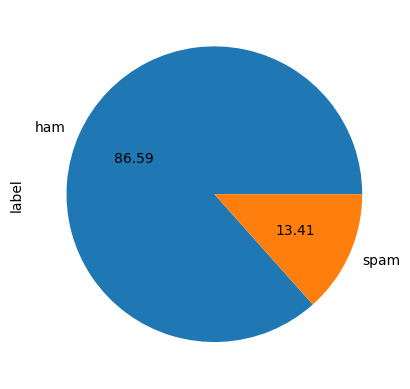

In [10]:
y.value_counts().plot(kind='pie', autopct='%.2f')

In [11]:
pip install pip -U


In [12]:
#pip install pillow wordcloud -U

In [13]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [14]:
# Filterd spam message
spam = df[df['label']=='spam']['text']
spam


2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

In [15]:
# Filterd not spam message
not_spam = df[df['label']=='ham']['text']
not_spam

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [16]:
spam  = " ".join(spam)
not_spam = " ".join(not_spam)

In [17]:
from wordcloud import WordCloud

In [18]:
wc = WordCloud(background_color='white').generate(not_spam)

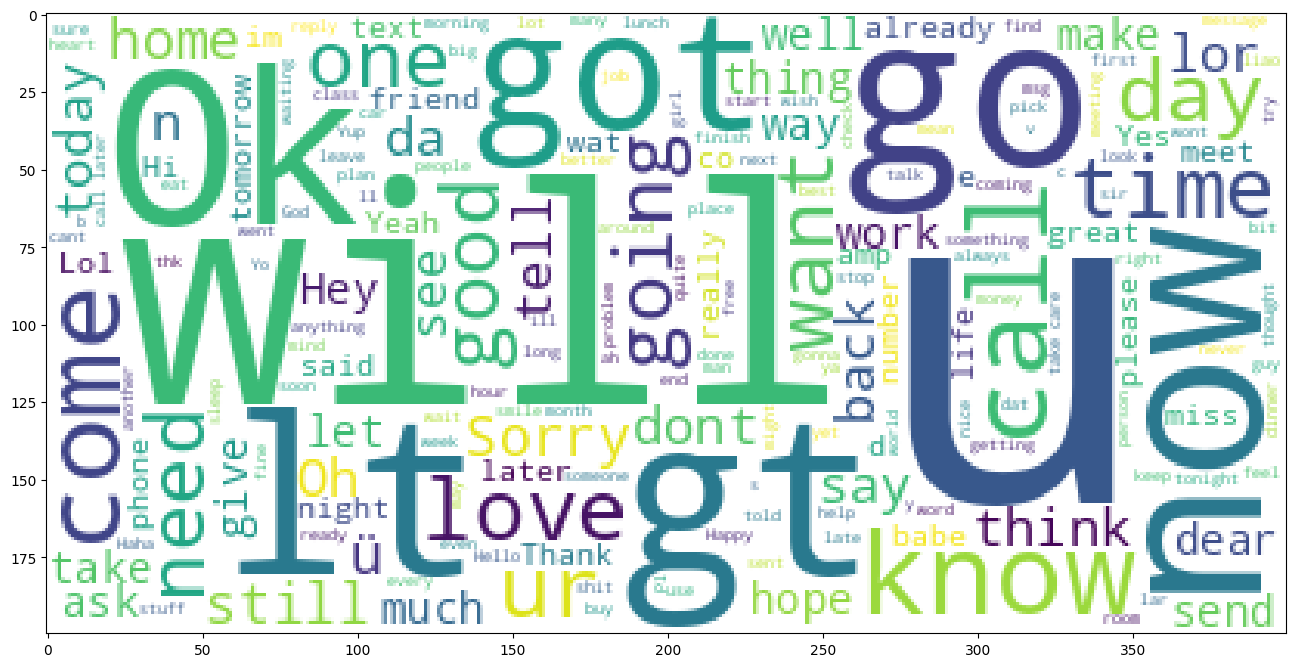

In [19]:
plt.figure(figsize=(16,9))
plt.imshow(wc)

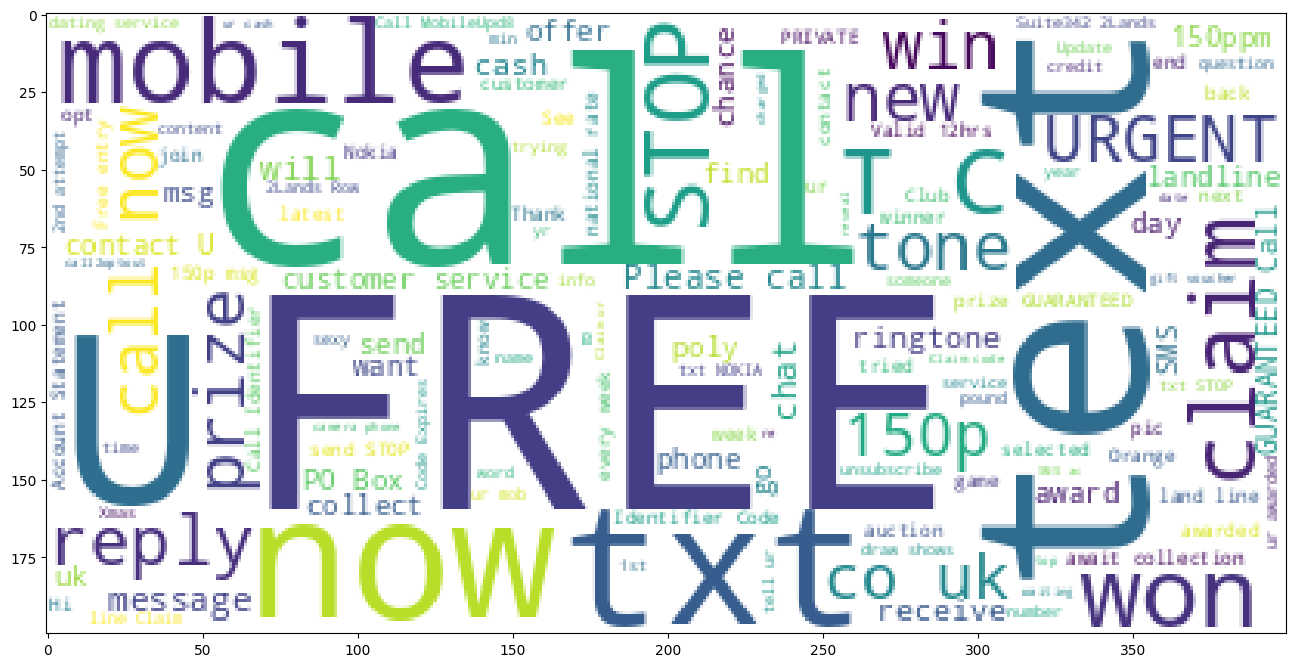

In [20]:
wc_spam = WordCloud(background_color='white').generate(spam)
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

## Data Preparation

In [21]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [22]:
sent = 'Hello friends! How are you? I like python programming.'

In [23]:
#1 Tokenize
token1 = word_tokenize(sent)

In [24]:
token1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'python',
 'programming',
 '.']

In [25]:
# Remove only the punchuations
token2 = [token for token in token1 if token.isalnum()]

In [26]:
token2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'python', 'programming']

In [27]:
# #) remove the stop words
swards = stopwords.words('english')

In [28]:
token3 = [token for token in token2 if token.lower() not in swards]

In [29]:
token3

['Hello', 'friends', 'like', 'python', 'programming']

In [30]:
# Removing th suffix
ps = PorterStemmer()
token4 = [ps.stem(token) for token in token3 ]

In [31]:
token4

['hello', 'friend', 'like', 'python', 'program']

In [32]:
def clean_text(sent):
    token1 = word_tokenize(sent)
    # Remove only the punchuations
    token2 = [token for token in token1 if token.isalnum()] 
    # #) remove the stop words
    swards = stopwords.words('english')
    token3 = [token for token in token2 if token.lower() not in swards]

    # Removing th suffix
    ps = PorterStemmer()
    token4 = [ps.stem(token) for token in token3 ]

    return token4
    

In [33]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [34]:
sent1 = 'It was the expected result on the occasion.'

In [35]:
clean_text(sent1)

['expect', 'result', 'occas']

In [36]:
x.loc[400]

'Hmmm...k...but i want to change the field quickly da:-)i wanna get system administrator or network administrator..'

In [37]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [38]:
## TF*IDF Vectorizer

In [39]:
# import the classs
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Crate the object
tfid = TfidfVectorizer(analyzer=clean_text)

In [41]:
x_new = tfid.fit_transform(x)

In [42]:
x_new

<5572x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 47556 stored elements in Compressed Sparse Row format>

In [43]:
# Cross-Validation


In [44]:
# Import the function
from sklearn.model_selection import train_test_split

In [45]:
# seperate the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_new, y ,random_state=0)

In [46]:
## Build the machine learning classification model


In [47]:
## import the class
from sklearn.svm  import SVC

In [48]:
# Create the object
svm = SVC(kernel='linear', random_state=0)

In [49]:
# Train the algorithnms
#%%time
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

### Performance Evaluation

In [50]:
y_pred = svm.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [52]:
confusion_matrix(y_test, y_pred)

array([[1207,    1],
       [  22,  163]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [54]:
accuracy_score(y_test, y_pred)

0.9834888729361091

In [55]:
## rgf : 0.9798994974874372
# linear : 0.9834888729361091


## Sample DataSet

In [56]:
file = open('sample.csv')
data = file.readlines()
data 

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [57]:

tfid.transform(data)

<3x6854 sparse matrix of type '<class 'numpy.float64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [58]:
svm.predict(tfid.transform(data))

array(['ham', 'spam', 'ham'], dtype=object)

Serialize the object

In [60]:

import joblib

In [61]:
joblib.dump(svm, 'classifier.model')

['classifier.model']

In [62]:
joblib.dump(tfid, 'preprocessor.model')

['preprocessor.model']